In [47]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Problem 2

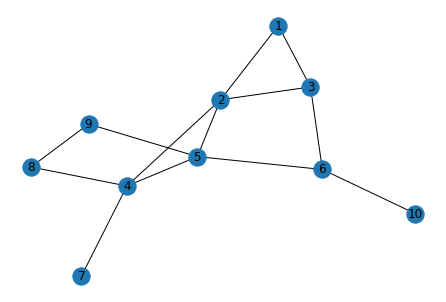

In [51]:
G = nx.Graph()
G.add_nodes_from([(i+1, {"weight": 0.5}) for i in range(10)])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2,4), (2,5), (3,6), (4, 5), (4, 7), (4, 8), (5, 6), (5, 9), (6, 10), (8, 9)])
G.nodes[5]["weight"] = 0
G.nodes[6]["weight"] = 1
G.nodes[7]["weight"] = 1
G.nodes[10]["weight"] = 1

nx.draw(G, with_labels = True)

In [52]:
for node in G.nodes():
    print(node, G.nodes[node]["weight"])

1 0.5
2 0.5
3 0.5
4 0.5
5 0
6 1
7 1
8 0.5
9 0.5
10 1


In [54]:
for i in range(2):
    number = [0 for _ in range(len(G.nodes()))]
    counter_ = 0
    for node in G.nodes():
        if G.nodes[node]["weight"] == 0 or G.nodes[node]["weight"] == 1:
            number[counter_] = G.nodes[node]["weight"]
            counter_ += 1
            continue
        prob = 0
        counter = 0
        for neigh in G.neighbors(node):
            counter += 1
            prob += G.nodes[neigh]["weight"]
        number[counter_] = prob/counter
        counter_ += 1
    counter_ = 0
    for node in G.nodes():
        G.nodes[node]["weight"] = number[counter_]
        counter_ += 1
for node in G.nodes():
    print(node, G.nodes[node]["weight"])    

1 0.5208333333333333
2 0.4036458333333333
3 0.6458333333333334
4 0.44791666666666663
5 0
6 1
7 1
8 0.359375
9 0.1875
10 1


In [46]:
for node in G.neighbors(1):
    print(node)

2
3
